# Problem Statement

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

###  Input Libraries



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

### Input Dateset



In [70]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Getting some Insights 

In [71]:
df.shape

(39717, 111)

### Identifying Missing Values in Columns

In [72]:
# columns having at least one missing value
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Dropping NULL Columns

In [73]:
df.drop(["mths_since_last_major_derog", "tot_hi_cred_lim","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m"], axis = 1, inplace = True)

In [74]:
df.drop(["open_il_12m", "open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m","acc_open_past_24mths","avg_cur_bal","bc_open_to_buy","bc_util","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mths_since_recent_inq","mths_since_recent_revol_delinq","num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"], axis = 1, inplace = True)

In [75]:
df.drop(["mths_since_last_record", "mths_since_last_delinq","next_pymnt_d","annual_inc_joint","dti_joint","verification_status_joint"], axis = 1, inplace = True)

In [76]:
df.drop(["acc_now_delinq","tax_liens"], axis = 1, inplace = True)

In [77]:
df.drop(["emp_title"], axis = 1, inplace = True)

In [19]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

### REMOVING NULL COLUMNS

In [79]:
df = df[~df.emp_length.isnull()]

In [80]:
df = df[~df.title.isnull()]

In [81]:
df = df[~df.revol_util.isnull()]

In [177]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          11955
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

In [25]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

### Changing column data types

In [83]:
df.int_rate = df.int_rate.apply(lambda x: x.split("%")[0])

In [84]:
df.int_rate = df.int_rate.astype("float")

In [85]:
df.revol_util = df.revol_util.apply(lambda x: x.split("%")[0])

In [86]:
df.revol_util = df.revol_util.astype("float")

In [ ]:
# removing months from column terms

In [87]:
df.term = df.term.apply(lambda x: x.split()[0])

In [88]:
df.term = df.term.astype("int32")

In [89]:
df['term'].value_counts()

36    28236
60    10349
Name: term, dtype: int64

### Removing Outliers

In [ ]:
# removing current from loan status

In [90]:
df = df[~df['loan_status'].isin(['Current'])]

In [ ]:
# Updating loan status as 0 for fully paid and charged off to 1

In [91]:
df["loan_status"] = df["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

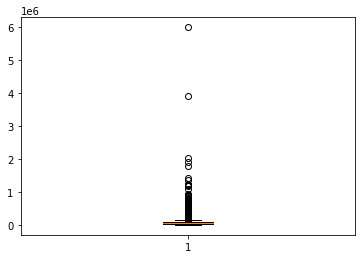

In [92]:
plt.boxplot(df.annual_inc)
plt.show()

In [93]:
df.annual_inc.describe()

count    3.748700e+04
mean     6.944113e+04
std      6.467910e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
# from the above box plot we can conculde that the outliers are present in this dataset hence removing outliers

In [94]:
annual_inc_temp = df["annual_inc"].quantile(0.99)

In [95]:
df = df[df["annual_inc"] < annual_inc_temp]

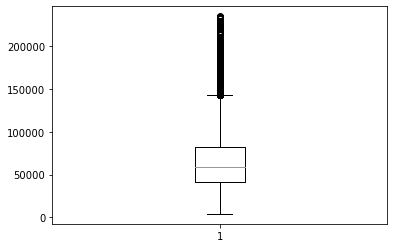

In [96]:
plt.boxplot(df.annual_inc)
plt.show()

In [ ]:
# Updating emp_length and updating <1 year as zero and 10+ as 10 

In [97]:
df["emp_length"] = df["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [180]:
# manipulating purpose data
loan_purpose_data = df["purpose"].value_counts()*100/df.shape[0]

# remove rows with less than 1% of value counts in paricular purpose 
loan_purpose_del = loan_purpose_data[loan_purpose_data<1].index.values
df = df[[False if p in loan_purpose_del else True for p in df["purpose"]]]

### Creating Continuos Bins

In [ ]:
# 1. Bin for annual_inc range

In [98]:
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bin_type = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
df['range_annual_inc'] = pd.cut(df['annual_inc'], bins, labels=bin_type)

In [ ]:
# 2. Bin for int_rate range

In [99]:
bins = [0, 7.5, 10, 12.5, 15, 100]
bin_type = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
df['range_int_rate'] = pd.cut(df['int_rate'], bins, labels=bin_type)

In [ ]:
# 3. Bin for dti_range

In [159]:
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bin_type = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
df['range_dti'] = pd.cut(df['dti'], bins, labels=bin_type)

In [ ]:
# 4. Bin for loan_amount_range

In [100]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bin_type = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
df['range_loan_amnt'] = pd.cut(df['loan_amnt'], bins, labels=bin_type)

# <font color = red> Data Visualization

## <font color = blue> Univariate Analysis ###

### _Defaulter Vs Non Defaulter_

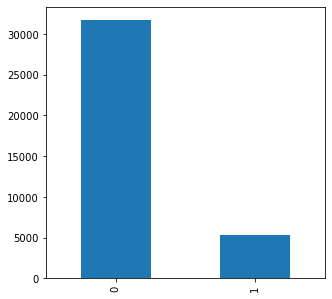

In [152]:
plt.figure(figsize=(5,5))
df['loan_status'].value_counts().plot.bar()
plt.show()

#### 1. Inference : The above visualization indicates that around 5000 people are defaulters from the dataset of 35000 people.

### _Defaulter Vs Loan Term_

<Figure size 720x360 with 0 Axes>

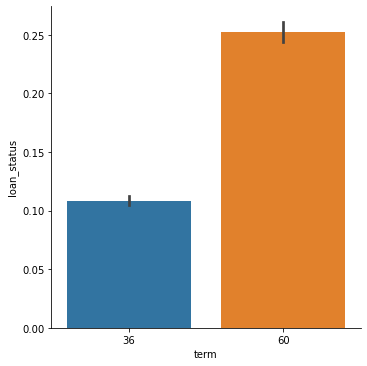

In [147]:
plt.figure(figsize=(10,5))
sns.catplot(x="term", y="loan_status",  kind="bar", data=df)

#### 2. Inference : The above visualization indicates that the there are more defaulters in 60 months term.

### _Verfication Status Vs Defaulter_

<Figure size 360x360 with 0 Axes>

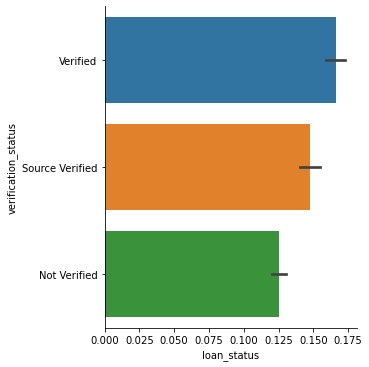

In [155]:
plt.figure(figsize=(5,5))
sns.catplot(x="loan_status", y="verification_status",  kind="bar", data=df)
plt.show()

#### 3. Inference : The above bar plot shows the defaulters are more towards verified resources, hence the graph is not useful.

### _Defaulter Vs Home OwnerShip_

<Figure size 720x360 with 0 Axes>

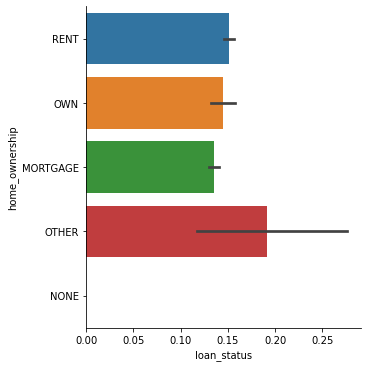

In [144]:
plt.figure(figsize=(10,5))
sns.catplot(x="loan_status", y="home_ownership",  kind="bar", data=df)
plt.show()

#### 4. Inference : The above bar plot shows the defaulters ratio is almost same in rent, own and mortage, hence the graph is not useful.

### _Defaulter Vs Grade_

<Figure size 3600x3600 with 0 Axes>

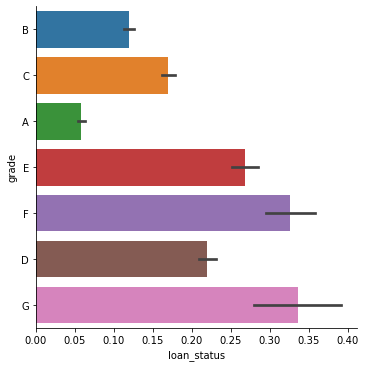

In [154]:
plt.figure(figsize=(50,50))
sns.catplot(x="loan_status", y="grade",  kind="bar", data=df)
plt.show()

#### 5. Inference : The above bar plot shows the defaulters ratio is most in grade E, F, G

### _Defaulter Vs Purpose_

<Figure size 1440x720 with 0 Axes>

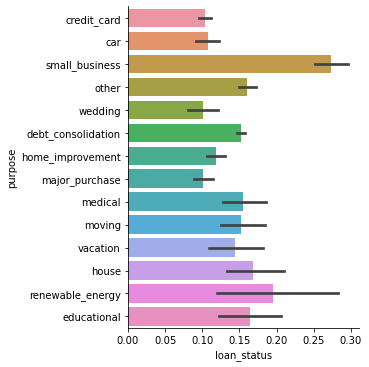

In [133]:
plt.figure(figsize=(20,10))
sns.catplot(x="loan_status", y="purpose",  kind="bar", data=df)
plt.show()

#### 6. Inference :  The defaulters rate is almost constant for all purpose type except ‘small business’, hence rate will rely on purpose of the loan.

## _Defaulter Vs Annual_Income_

<Figure size 1440x720 with 0 Axes>

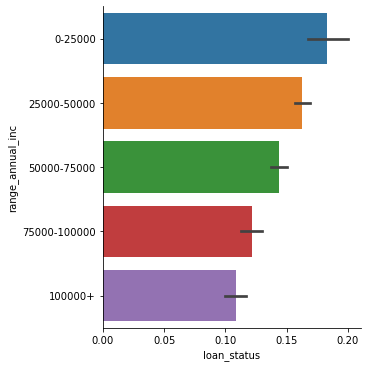

In [141]:
plt.figure(figsize=(20,10))
sns.catplot(x="loan_status", y="range_annual_inc",  kind="bar", data=df)
plt.show()

#### 7. Inference : The default rate is more towards 0-25000 annual income range, hence rate will rely on range_annual_inc feature.

### _Defaulter Vs Loan_Amount_Range_

<Figure size 1440x720 with 0 Axes>

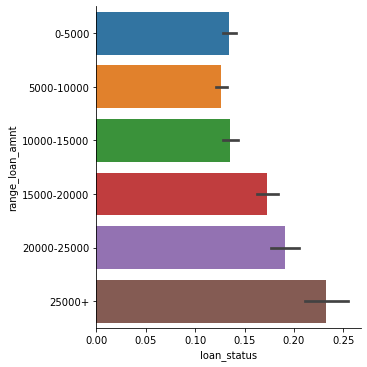

In [140]:
plt.figure(figsize=(20,10))
sns.catplot(x="loan_status", y="range_loan_amnt",  kind="bar", data=df)
plt.show()

#### 8. Inference :  The default rate is more towards 25000+ loan range, hence rate will rely on loan_amnt_range feature.

### _Defaulter Vs Interest Range_

<Figure size 1440x720 with 0 Axes>

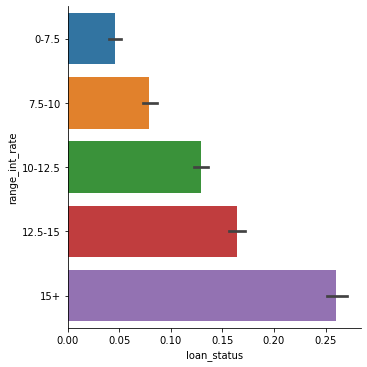

In [156]:
plt.figure(figsize=(20,10))
sns.catplot(x="loan_status", y="range_int_rate",  kind="bar", data=df)
plt.show()

#### 9. Inference : The default rate is more towards 15+ interest rate range, hence rate will rely on interest_rate_range feature.

### _Defaulter Vs DTI Range_

<Figure size 1440x720 with 0 Axes>

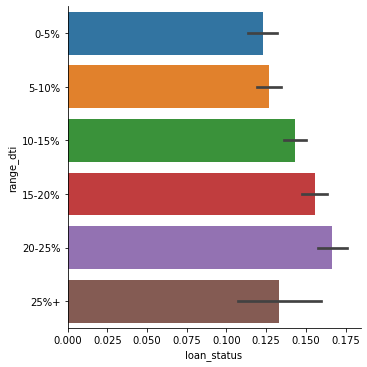

In [160]:
plt.figure(figsize=(20,10))
sns.catplot(x="loan_status", y="range_dti",  kind="bar", data=df)
plt.show()

####  10. Inference : From this graph, we can infer that the defaulters are increasing with DTI% .

## <font color = blue> Bivariate Analysis ###

### _Defaulter Vs Pupose Vs Loan_Amount_Range_

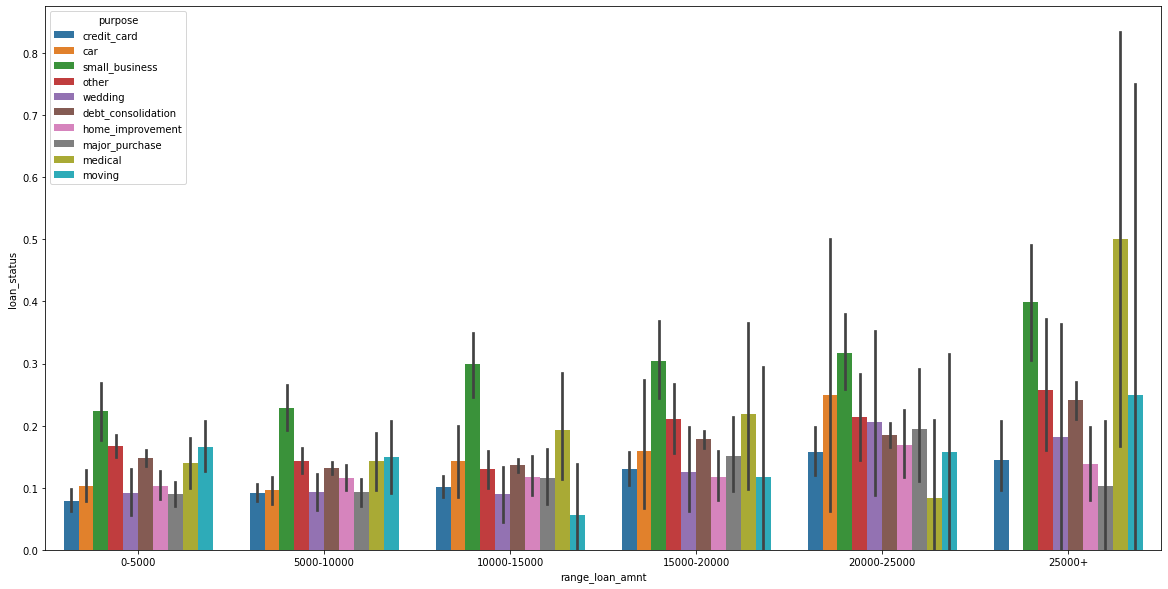

In [195]:
plt.figure(figsize=(20,10))
sns.barplot(x="range_loan_amnt", y='loan_status', hue="purpose", data=df)
plt.show()

#### 11. Inference : We can infer that default ratio increases for every purpose with respect to loan amount.

### _Defaulter Vs Pupose Vs Annual_Income_Range_


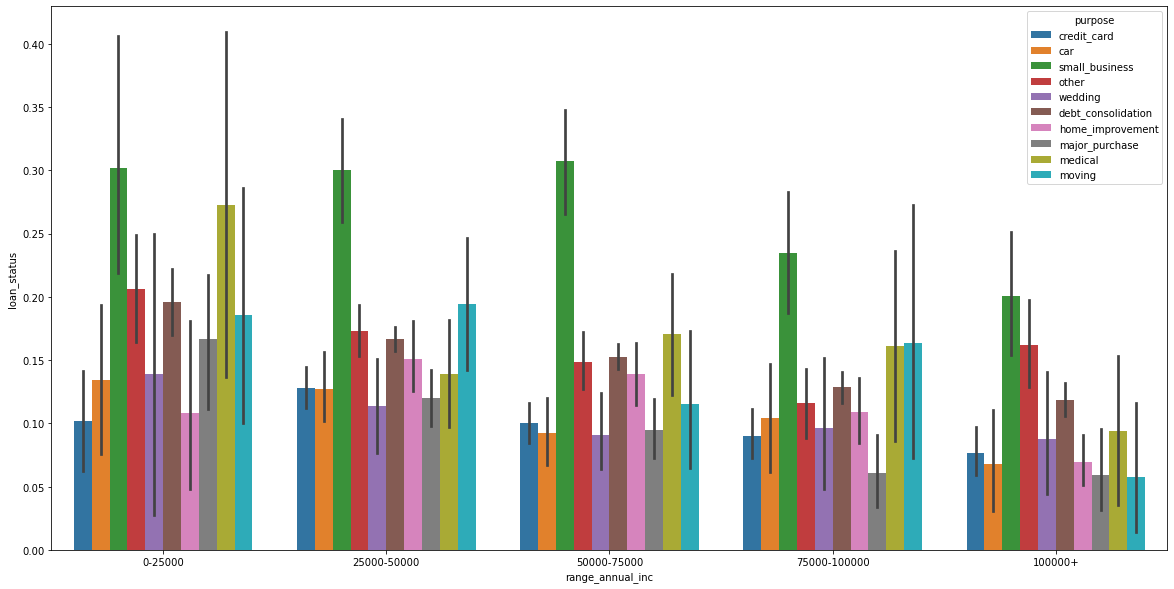

In [182]:
plt.figure(figsize=(20,10))
sns.barplot(x="range_annual_inc", y='loan_status', hue="purpose", data=df)
plt.show()

#### 12. Inference : This graph shows no correlation between annual_income_range and purpose.

### _Defaulter Vs Loan Amount Range Vs Term_

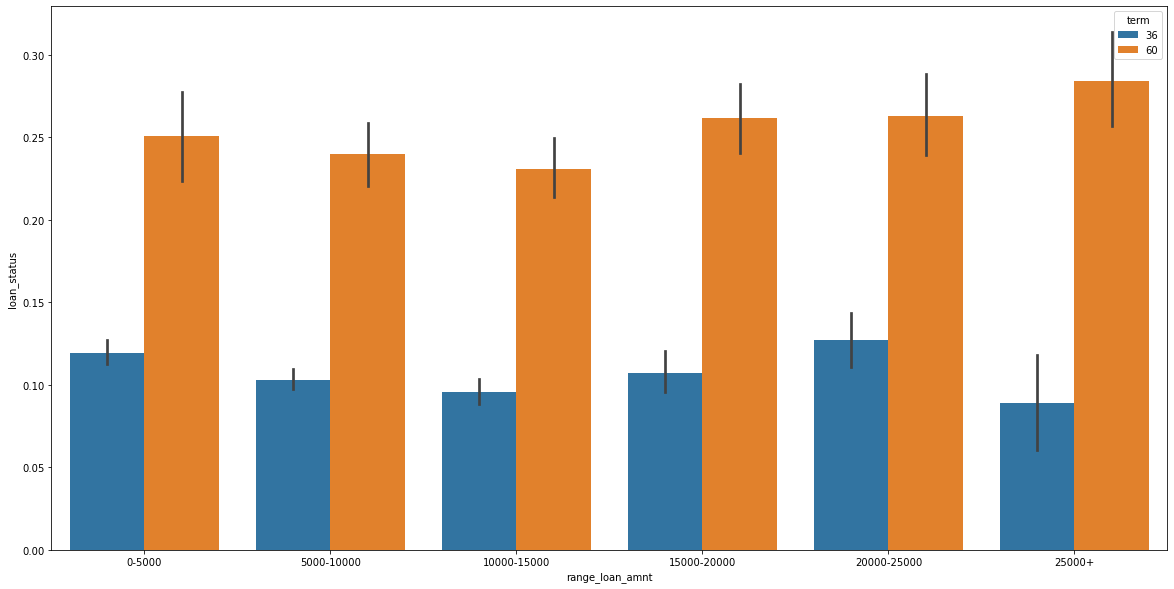

In [185]:
plt.figure(figsize=(20,10))
sns.barplot(x="range_loan_amnt", y='loan_status', hue="term", data=df)
plt.show()

#### 13. Inference : This graph indicates that every default ratio increases for every term with respect to loan_amount_range.

### _Defaulter Vs Pupose Vs Grade_

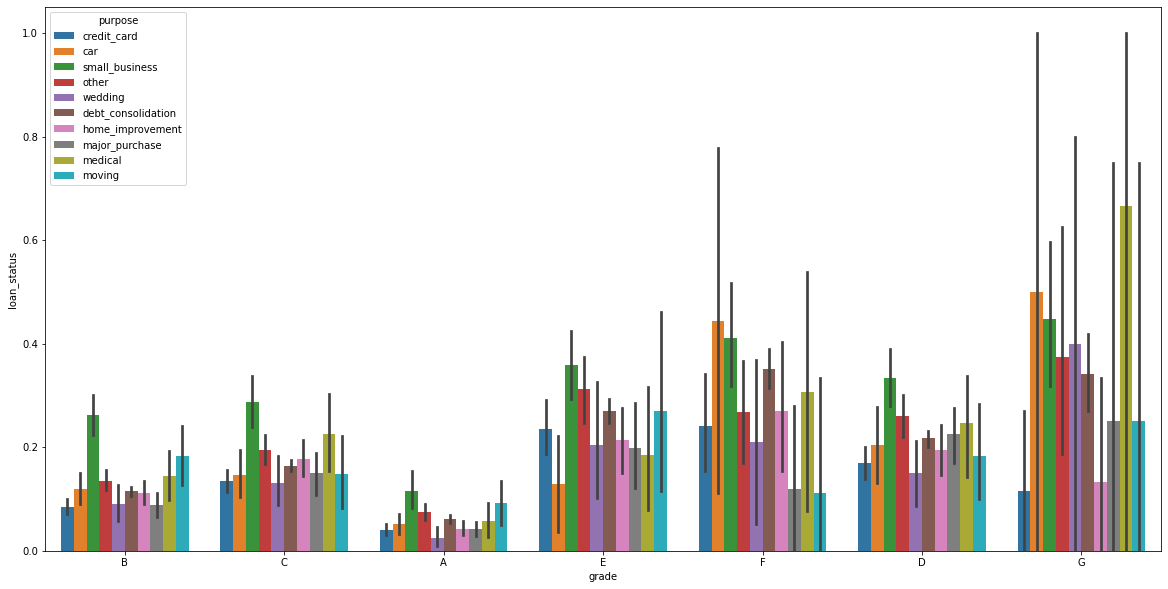

In [181]:
plt.figure(figsize=(20,10))
sns.barplot(x="grade", y='loan_status', hue="purpose", data=df)
plt.show()

#### 14. Inference : The above graph indicates that default ratio increases for every purpose with respect to grades.

### _Defaulter Vs Pupose Vs Term_

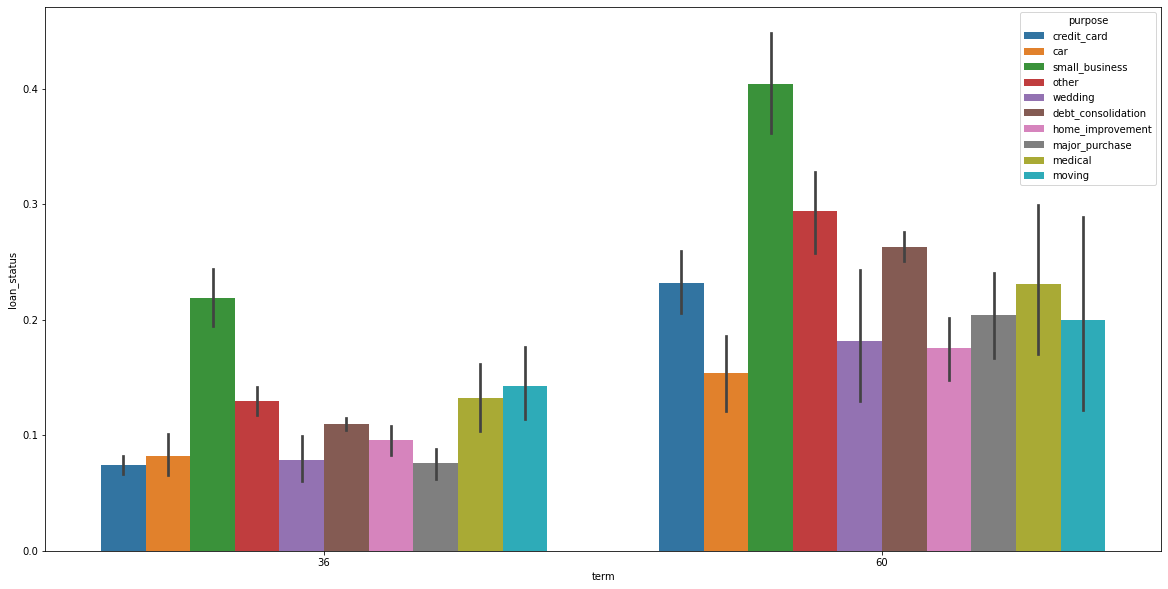

In [184]:
plt.figure(figsize=(20,10))
sns.barplot(x="term", y='loan_status', hue="purpose", data=df)
plt.show()

#### 15. This visualization indicates purpose of defaulters with respect to grades.

## <font color = blue> Multivariate Analysis ###

### _Correlation_

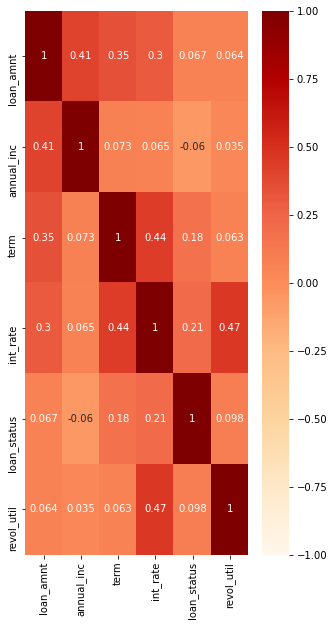

In [197]:
cont_func = ["loan_amnt", "annual_inc", "term", "int_rate", "loan_status", "revol_util"]
corr_loan = df[cont_func].corr()
sns.heatmap(corr_loan,vmin=-1.0,vmax=1.0,annot=True, cmap="OrRd")
plt.show()